In [1]:
import re
import json
from flask import jsonify
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import dotenv

In [2]:
brent_url = r'https://api.stlouisfed.org/fred/series/observations?series_id=DCOILBRENTEU&realtime_start=1776-07-04&realtime_end=9999-12-31'
wti_url = r'https://api.stlouisfed.org/fred/series/observations?series_id=DCOILWTICO&realtime_start=1776-07-04&realtime_end=9999-12-31'
links = [brent_url, wti_url]

api_key_base = os.environ.get('FRED_API_KEY')
api_key = '&api_key=' + str(api_key_base) + '&file_type=json'

# Brent
brent_request = requests.get(brent_url + api_key)
json_item = json.loads(brent_request .text)
json_item = json_item["observations"]
df_brent = pd.DataFrame(json_item)
print(df_brent.shape)
print("Brent")
print(df_brent.head)
print(df_brent.columns)
print(df_brent.shape)

# WTI
wti_request = requests.get(wti_url + api_key)
json_item = json.loads(wti_request .text)
json_item = json_item["observations"]
df_wti = pd.DataFrame(json_item)

print("WTI")
print(df_wti.head)
print(df_wti.columns)
print(df_wti.shape)



(9910, 4)
Brent
<bound method NDFrame.head of      realtime_start realtime_end        date  value
0        2011-04-06   9999-12-31  1987-05-20  18.63
1        2011-04-06   9999-12-31  1987-05-21  18.45
2        2011-04-06   9999-12-31  1987-05-22  18.55
3        2011-04-06   9999-12-31  1987-05-25  18.60
4        2011-04-06   9999-12-31  1987-05-26  18.63
...             ...          ...         ...    ...
9905     2025-02-05   9999-12-31  2025-01-28  78.01
9906     2025-02-05   9999-12-31  2025-01-29  77.02
9907     2025-02-05   9999-12-31  2025-01-30  77.42
9908     2025-02-05   9999-12-31  2025-01-31  77.11
9909     2025-02-05   9999-12-31  2025-02-03  76.49

[9910 rows x 4 columns]>
Index(['realtime_start', 'realtime_end', 'date', 'value'], dtype='object')
(9910, 4)
WTI
<bound method NDFrame.head of       realtime_start realtime_end        date  value
0         2011-04-06   9999-12-31  1986-01-02  25.56
1         2011-04-06   9999-12-31  1986-01-03  26.00
2         2011-04-06   999

In [3]:
window_size = 20

# Brent
sum = 0
arr = []
rows_to_drop = []
for index, entry in enumerate(df_brent["value"]):
    # print("here")
    try:
        arr.append(entry)
    except Exception as e:
        arr.append(None)
    if entry == '.':
        rows_to_drop.append(index)
df_brent.drop(index=rows_to_drop, inplace=True)
print(df_brent.shape)
# Drop rows where the 'value' column equals '.'
# df_brent = df_brent[df_brent["value"] != '.']

numeric_series = pd.to_numeric(arr, errors='coerce').astype("float")
brent_series = pd.Series(numeric_series)
brent_mean = brent_series.mean()
brent_std = brent_series.std()
brent_obs = brent_series.shape[0]

print("Brent Mean, ", brent_mean)

# Brent Series
# plt.figure(figsize=(18,6))
# plt.plot(brent_series)
# plt.title("Brent Crude Series", fontsize=14)
# plt.xlabel("Time", fontsize=14)
# plt.show()

# Brent Moving Average
# brent_window = brent_series.rolling(window_size)
# moving_avg_brent = brent_window.mean()
# plt.figure(figsize=(18,6))
# plt.plot(moving_avg_brent)
# plt.title("Brent Crude Moving Average", fontsize=14)
# plt.xlabel("Time", fontsize=14)
# plt.show()

(9627, 4)
Brent Mean,  50.43732003739482


In [4]:
# WTI
arr = []
rows_to_drop = []
for index, entry in enumerate(df_wti["value"]):
    # print("here")
    try:
        arr.append(entry)
    except Exception as e:
        arr.append(None)
    if entry == '.':
        rows_to_drop.append(index)
df_wti.drop(index=rows_to_drop, inplace = True)

numeric_series_wti = pd.to_numeric(arr, errors='coerce').astype("float")
wti_series = pd.Series(numeric_series_wti)

wti_mean = wti_series.mean()
wti_std = wti_series.std()
wti_obs = wti_series.shape[0]

print("WTI Mean, ", wti_mean)

# WTI Series
# plt.figure(figsize=(18,6))
# plt.plot(wti_series)
# plt.title("WTI Series", fontsize=14)
# plt.xlabel("Time", fontsize=14)
# plt.show()

# WTI Moving Average
# wti_window = wti_series.rolling(window_size)
# moving_average_wti = wti_window.mean()
# plt.figure(figsize=(18,6))
# plt.plot(moving_average_wti)
# plt.title("WTI Moving Average", fontsize=14)
# plt.xlabel("Time", fontsize=14)
# plt.show()

WTI Mean,  47.76963463867581


In [5]:
# https://medium.com/@m.alruqimi/crude-brent-oil-from-analysis-to-forecasting-python-and-pytorch-code-part1-1-eb3ae38664db

# df_brent
# df_wti

# Coerce to Date
print(df_brent.shape)
# df_brent["date"] = pd.to_datetime(df_brent["date"])
# df_wti["date"] = pd.to_datetime(df_wti["date"])
# df_brent = df_brent.dropna(subset=['date'], inplace=True)
# df_wti = df_wti.dropna(subset=['date'], inplace=True)
# df_brent = df_brent.set_index('date').sort_index()
# df_wti = df_wti.set_index('date').sort_index()

df_wti_brent_merged = df_brent.join(df_wti, how='inner', lsuffix='_brent', rsuffix='_wti')
df_wti_brent_merged = df_wti_brent_merged.reset_index()
print(df_wti_brent_merged.columns)
print(df_wti_brent_merged.head)

# plt.scatter(df_wti_brent_merged['value_brent'], df_wti_brent_merged['value_wti'], s=5, alpha=0.8)
# plt.show()

# plt.hexbin(df_wti_brent_merged['value_brent'], df_wti_brent_merged['value_wti'], gridsize=30, cmap='viridis')
# plt.show()


(9627, 4)
Index(['index', 'realtime_start_brent', 'realtime_end_brent', 'date_brent',
       'value_brent', 'realtime_start_wti', 'realtime_end_wti', 'date_wti',
       'value_wti'],
      dtype='object')
<bound method NDFrame.head of       index realtime_start_brent realtime_end_brent  date_brent value_brent  \
0         0           2011-04-06         9999-12-31  1987-05-20       18.63   
1         1           2011-04-06         9999-12-31  1987-05-21       18.45   
2         2           2011-04-06         9999-12-31  1987-05-22       18.55   
3         3           2011-04-06         9999-12-31  1987-05-25       18.60   
4         4           2011-04-06         9999-12-31  1987-05-26       18.63   
...     ...                  ...                ...         ...         ...   
9280   9905           2025-02-05         9999-12-31  2025-01-28       78.01   
9281   9906           2025-02-05         9999-12-31  2025-01-29       77.02   
9282   9907           2025-02-05         9999-12-31  2

Index(['index', 'realtime_start_brent', 'realtime_end_brent', 'value_brent',
       'realtime_start_wti', 'realtime_end_wti', 'date_wti', 'value_wti'],
      dtype='object')


C:\Users\johnm\AppData\Local\Temp\ipykernel_30232\3986452193.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


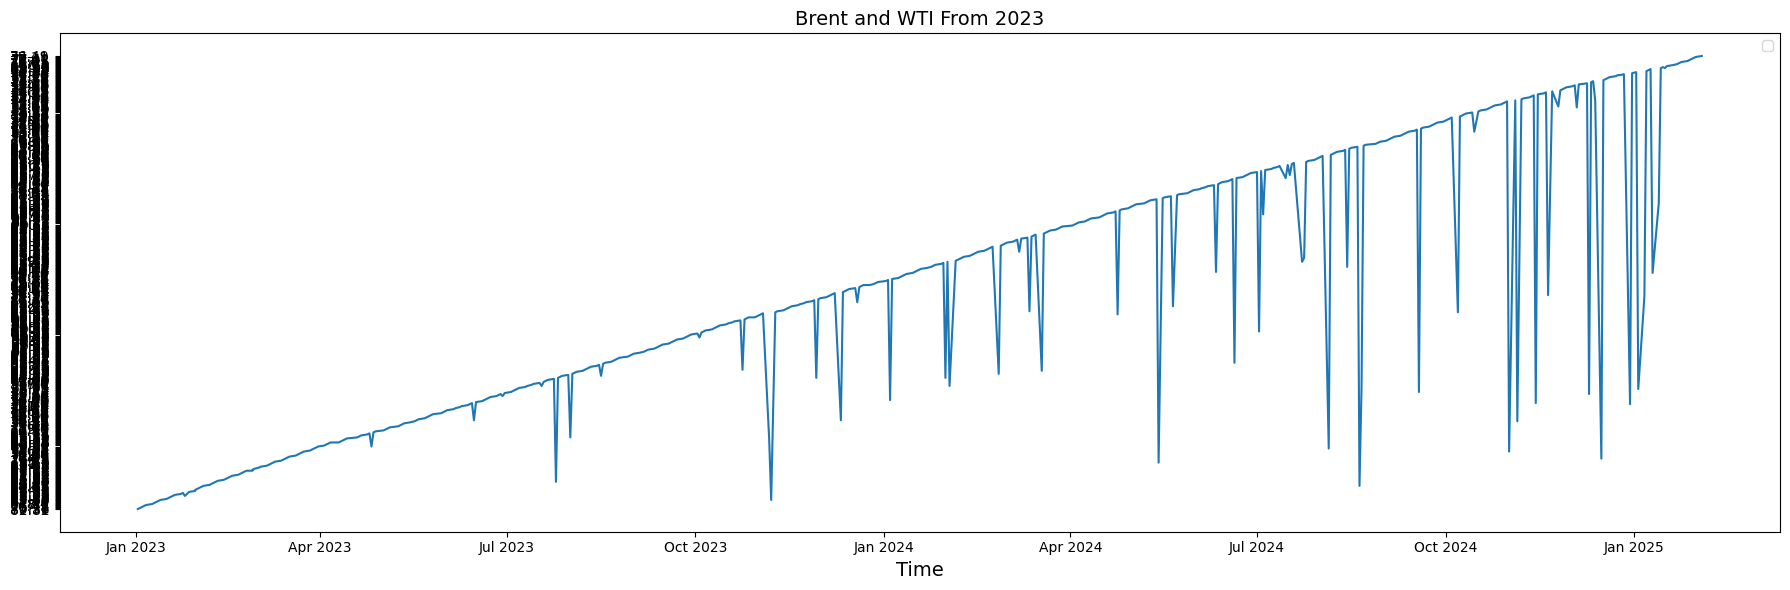

TypeError: no numeric data to plot

In [6]:
# https://medium.com/@m.alruqimi/crude-brent-oil-from-analysis-to-forecasting-python-and-pytorch-code-part1-1-eb3ae38664db
# bokeh 
# holowviews / hvPlot
# 
# import datashader as ds
# import datashader.transfer_function as tf
# from datashader import Canvas
import matplotlib.dates as mdates


# Ways to plot large data sets in a more efficient manner
# Taking a median or average of each year and plotting that
# Or plotting across month

df_w_b = df_wti_brent_merged
df_w_b['date_brent'] = pd.to_datetime(df_w_b['date_brent'])
df_w_b = df_w_b.set_index('date_brent').sort_index()

print(df_w_b.columns)
plt.figure(figsize=(18,6))
df_2023 = df_w_b[df_w_b.index > '2022-12-31']
plt.plot(df_2023["value_brent"])
# plt.plot(df_w_b["value_wti"].loc[df_w_b["date"] > '2022-12-31'])
plt.title("Brent and WTI From 2023", fontsize=14)
plt.xlabel("Time", fontsize=14)
# plt.gca().xaxis.set_major_locator(mdates.MonthLocater())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.legend()
plt.tight_layout()
plt.show()

import seaborn as sns

sns.set_style("whitegrid")
df_2023.plot(y=["value_brent", "value_wti"], figsize=(18,6))
plt.title("Brent and WTI From 2023", fontsize=14)
plt.xlabel("Time", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

# plt.figure(figsize=(18,6))
# df_2023 = df_brent[df_brent["date"] > '2022-12-31']
# plt.plot(df_2023["date"], df_2023["value"])
# # plt.plot(df_w_b["value_wti"].loc[df_w_b["date"] > '2022-12-31'])
# plt.title("Brent and WTI From 2023", fontsize=14)
# plt.xlabel("Time", fontsize=14)
# # plt.gca().xaxis.set_major_locator(mdates.MonthLocater())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# plt.legend
# plt.tight_layout()
# plt.show()



In [ ]:
# from statsmodels.ts.arima_process import ArmaProcess
